<a href="https://colab.research.google.com/github/Namyalg/Projects_in_python/blob/master/3Dimensional_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
width = 300
height = 360

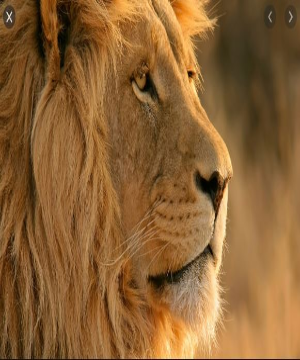

In [15]:
img = cv2.imread('/content/Lion.JPG')
img = cv2.resize(img, (width , height))
cv2_imshow(img)


In [0]:
#The pixels are extracted from the image
pixels = []
for i in range(height):
  for j in range(width):
    pixels.append(img[i,j])

#The RGB streams are stored in different arrays to facilitate the process of convolution
b = []
g = []
r = []

for i in pixels:
  b.append(i[0])
  g.append(i[1])
  r.append(i[2])

r = np.array(r).reshape(height, width)
b = np.array(b).reshape(height, width)
g = np.array(g).reshape(height, width)

In [0]:
b_kernel = np.array([0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.11]).reshape(3,3)
r_kernel = np.array([0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.11]).reshape(3,3)
g_kernel = np.array([0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.11 , 0.11]).reshape(3,3)

In [0]:
def convolute(arr , height , width ,kernel):
  convoluted_matrix = []
  for i in range(1,height-2):
    for j in range(1,width-2):
      temp = arr[i:i+3 , j:j+3]
      prod = np.multiply(temp,kernel)
      convoluted_matrix.append(np.sum(prod))

  convoluted_matrix = (np.array(convoluted_matrix).reshape(height-3,width-3))
  return(convoluted_matrix)

r_convol = convolute(r, height, width, r_kernel)
g_convol = convolute(g, height, width, g_kernel)
b_convol = convolute(b, height, width, b_kernel)


In [8]:
print(r_convol.shape, b_convol.shape, g_convol.shape)


(357, 297) (357, 297) (357, 297)


In [0]:
width = width - 3
height = height - 3

combine = np.zeros([height, width, 3], dtype=np.uint8)

for i in range(height):
  for j in range(width):

    combine[i ,j] = [int(r_convol[i][j]) , int(g_convol[i][j]) , int(b_convol[i][j])]


from PIL import Image
img = Image.fromarray(combine)
img.save('lionsharpen.jpg')

In [0]:
height = height - 3
width = width - 3

combine = np.zeros([height, width, 3], dtype=np.uint8)

for i in range(height):
  for j in range(width):

    combine[i ,j] = [int(r_convol[i][j]) , int(g_convol[i][j]) , int(b_convol[i][j])]



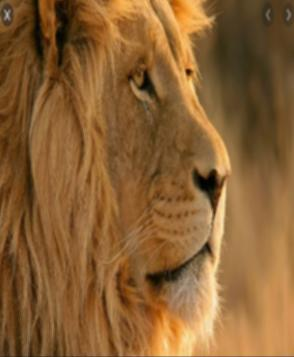

In [21]:

img = Image.fromarray(combine)
img.save('Blurred_Lion.jpg')
img = cv2.imread('/content/Blurred_Lion.jpg')
cv2_imshow(img)